<a href="https://colab.research.google.com/github/ravadhani/NLP/blob/main/SimilarityOfDocuments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement:**

You want to give readers of an online portal a better reading experience by recomminding articles to the reader on the basis of current article the reader is reading.

***This is a case study for finding similar documents.***

In [2]:
#libraries to display dataframe and images
from IPython.display import display
from PIL import Image
#matplotlib for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#inbuild library to work with textual data
import string
#setting up NLTK for preprocessing text data
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download('universal_tagset')
nltk.download('treebank')

sns.set_theme(style="darkgrid")
pd.set_option("display.max_columns", 100)
%matplotlib inline



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


Link for dataset: https://drive.google.com/file/d/1MyOEKk_z78P8JL0mTYSerRiPLVflkVK6/view

In [3]:
!gdown 1MyOEKk_z78P8JL0mTYSerRiPLVflkVK6

Downloading...
From: https://drive.google.com/uc?id=1MyOEKk_z78P8JL0mTYSerRiPLVflkVK6
To: /content/medium_articles_v3.csv
100% 3.13M/3.13M [00:00<00:00, 198MB/s]


In [4]:
import numpy as np
import pandas as pd
import spacy
from spacy import displacy

#reading data file
df = pd.read_csv("/content/medium_articles_v3.csv")
display(df.head())
print("\nShape of the dataframe: {}".format(df.shape))

,link,title,sub_title,author,reading_time,text,id
0,https://towardsdatascience.com/ensemble-method...,"Ensemble methods: bagging, boosting and stacking",Understanding the key concepts of ensemble lea...,Joseph Rocca,20,This post was co-written with Baptiste Rocca.\...,1
1,https://towardsdatascience.com/understanding-a...,Understanding AUC - ROC Curve,"In Machine Learning, performance measurement i...",Sarang Narkhede,5,"In Machine Learning, performance measurement i...",2
2,https://towardsdatascience.com/how-to-work-wit...,How to work with object detection datasets in ...,"A comprehensive guide to defining, loading, ex...",Eric Hofesmann,10,Microsoft's Common Objects in Context dataset ...,3
3,https://towardsdatascience.com/11-dimensionali...,11 Dimensionality reduction techniques you sho...,Reduce the size of your dataset while keeping ...,Rukshan Pramoditha,16,"In both Statistics and Machine Learning, the n...",4
4,https://towardsdatascience.com/the-time-series...,The Time Series Transformer,Attention Is All You Need they said. Is it a m...,Theodoros Ntakouris,6,Attention Is All You Need they said. Is it a m...,5



Shape of the dataframe: (208, 7)


In [5]:
print("\nShape of the dataframe: " + format(df.shape))


Shape of the dataframe: (208, 7)


In [3]:
from pprint import pprint

pprint(df.iloc[1].to_dict(), compact=True)

{'author': 'Sarang Narkhede',
 'id': 2,
 'link': 'https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5?source=tag_archive---------1-----------------------',
 'reading_time': 5,
 'sub_title': 'In Machine Learning, performance measurement is an essential '
              'task. So when it comes to a classification problem, we can '
              'count on an AUC - ROC Curve. When we need to check or visualize '
              'the performance...',
 'text': 'In Machine Learning, performance measurement is an essential task. '
         'So when it comes to a classification problem, we can count on an AUC '
         '- ROC Curve. When we need to check or visualize the performance of '
         'the multi-class classification problem, we use the AUC (Area Under '
         'The Curve) ROC (Receiver Operating Characteristics) curve. It is one '
         'of the most important evaluation metrics for checking any '
         "classification model's performance. It is also written

In [7]:
#Statistical summary of the dataframe
df.describe(include='all')

,link,title,sub_title,author,reading_time,text,id
count,208,208,208,208,208.000000,208,208.000000
unique,208,208,204,179,NaN,208,NaN
top,https://towardsdatascience.com/ensemble-method...,"Ensemble methods: bagging, boosting and stacking",Update: This article is part of a series. Chec...,Adam Geitgey,NaN,This post was co-written with Baptiste Rocca.\...,NaN
freq,1,1,4,5,NaN,1,NaN
mean,NaN,NaN,NaN,NaN,12.375000,NaN,107.091346
std,NaN,NaN,NaN,NaN,13.880224,NaN,62.575453
min,NaN,NaN,NaN,NaN,2.000000,NaN,1.000000
25%,NaN,NaN,NaN,NaN,6.000000,NaN,52.750000
50%,NaN,NaN,NaN,NaN,9.000000,NaN,107.500000
75%,NaN,NaN,NaN,NaN,13.000000,NaN,162.250000


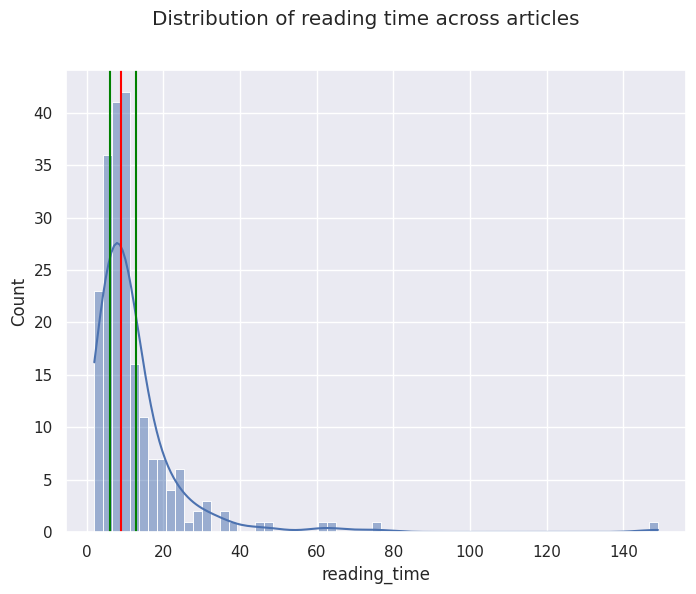

In [8]:
#Distribution of reading times in our corpus
fig, axes = plt.subplots(figsize = (8, 6))
#creating histograms
sns.histplot(df['reading_time'], kde=True, ax = axes)
#Computing percentile of the reading_time data
first_q = np.percentile(df['reading_time'], 25)
second_q = np.percentile(df['reading_time'], 50)
third_q = np.percentile(df['reading_time'], 75)
#green lines for 25th and 75th percentile
plt.axvline(first_q, color="green")
plt.axvline(third_q, color="green")
#red line for median reading_time
plt.axvline(second_q, color="red")
#plot title
plt.suptitle("Distribution of reading time across articles")
plt.show()


*   We can see the graph is right skewed.
*   Most of the articles in our corpus have a less reading time, with few articles having reading time in hours.
*   The median reading time is 9minutes.


**Reading time Vs Article length**

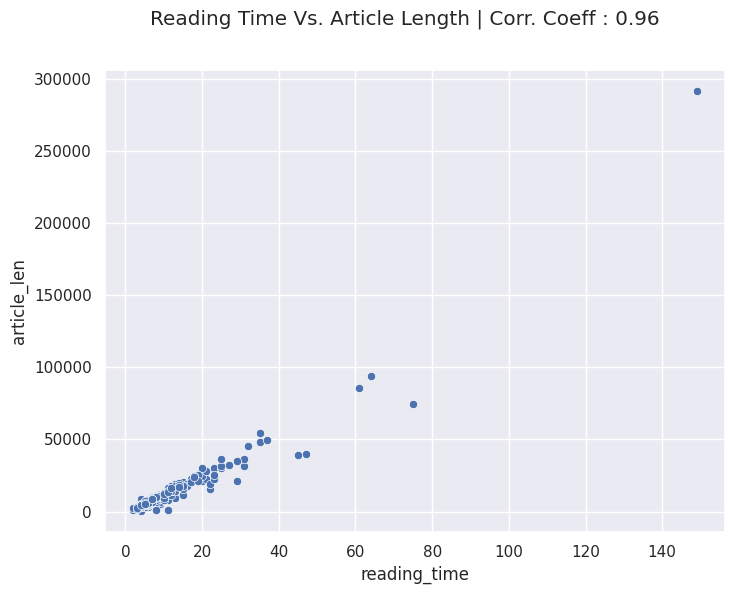

In [5]:
from scipy.stats import pearsonr

df['article_len'] = df['text'].apply(lambda x : len(x))
#creating scatterplot
fig, axes = plt.subplots(figsize = (8, 6))
sns.scatterplot(x = df['reading_time'], y=df['article_len'])
#Pearson correlation coefficient measures the linear relationship between two set of values
corr_coeff, _ = pearsonr(df['reading_time'], df['article_len'])
#plot title
plt.suptitle("Reading Time Vs. Article Length | Corr. Coeff : {}".format(round(corr_coeff, 2)))
plt.show()




*   As we can observe from the above scatter plot, the reading time and article length are correlated.




**Understanding the data** - by taking a look at the articles written by each author. Are these articles written by the same author similar or on the same topic.

In [5]:
for author, count in dict(df['author'].value_counts()).items():
  if(count < 2):
    continue
  print("Articles by {}".format(author))
  for title in df[df['author'] == author]['title'].values:
    print(title)
  print("-"*120)


Articles by Adam Geitgey
Machine Learning is Fun Part 5: Language Translation with Deep Learning and the Magic of Sequences
Machine Learning is Fun! Part 4: Modern Face Recognition with Deep Learning
Machine Learning is Fun! Part 3: Deep Learning and Convolutional Neural Networks
Machine Learning is Fun! Part 2
Machine Learning is Fun Part 6: How to do Speech Recognition with Deep Learning
------------------------------------------------------------------------------------------------------------------------
Articles by Joseph Rocca
Ensemble methods: bagging, boosting and stacking
Understanding Variational Autoencoders (VAEs)
Understanding Generative Adversarial Networks (GANs)
------------------------------------------------------------------------------------------------------------------------
Articles by Natassha Selvaraj
I tripled my income with data science. Here's how.
How to Land a Data Analytics Job in 6 Months
Top 10 Data Science Projects for Beginners
-----------------------

*   From above we can see that the authors tend to write multiple articles on the same topic.
*   But alos, there are multiple authors writing on the same topic.

#Text Preprocessing

Using contractions library to remove the contractions and expand them.
It is not feasible to do them manually using a dictionary as there are many contractions.

In [6]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 13.3 MB/s eta 0:00:00


In [7]:
import contractions

# sample data
sample_text = """
I've decided to go to the party after all. I'll reach by 05:00 PM.
He's not coming with us.
It's his birthday and he has other plans.
They've thought about going to the movies.
I won't be going to movies.
"""
#checking with a sample text
expanded_text = contractions.fix(sample_text)
print(expanded_text)



I have decided to go to the party after all. I will reach by 05:00 PM.
He is not coming with us.
It is his birthday and he has other plans.
They have thought about going to the movies.
I will not be going to movies.



Steps for preprocessing the text data we have:



1.   Split the article into sentences.
2.   For each sentence in the corpus -
      1.   Convert the sentence to lowercase
      2.   Expand contractions
      1.   Lemmatization
      2.   Remove stopwords
      1.   Remove punctuations










In [8]:
#for processing the sentences
import re

def process_sentence(sentence, nlp_object):
  #convert to lowercase
  sentence = sentence.lower()

  #expanding contractions
  sentence = contractions.fix(sentence)

  #lemmatization and removing stopwords
  doc = nlp_object(sentence)
  sentence = " ".join([token.lemma_ for token in doc if not token.is_stop])

  #remove punctuation
  for p in string.punctuation:
    sentence = sentence.replace(p, " ")

  sentence  = re.sub(r"\s+", " ", sentence) # replace multiple whitespaces with a singe space

  return sentence

In [9]:
from tqdm.notebook import tqdm
#tqdm to see real time progress
tqdm.pandas()

#Loading English language pipeline from spaCy: nlp = spacy.load('en_core_web_sm')
#It loads the English language processing pipeline from spaCy.
#This pipeline includes various components such as tokenization, part-of-speech tagging,
#named entity recognition, and dependency parsing, which can be applied to text data.

nlp = spacy.load('en_core_web_sm')  # English pipeline optimized for CPU

def process_article(article_text, nlp_object):
  processed_article_sentences = []
  #using nltk sentence tokenizer
  for sentence in sent_tokenize(article_text):
    #preprocessing each sentence using our process_sentence function
    processed_article_sentences.append(process_sentence(sentence, nlp_object))

  #joining preprocessed sentences as complete pragraph of the article
  return " ".join(processed_article_sentences)

df['processed_text'] = df['text'].progress_apply(lambda x : process_article(x, nlp))




  0%|          | 0/208 [00:00<?, ?it/s]

The article text is processed and tokenized. Now we need to find similarity between articles using this processed text.

**Document Similarity**

We first need to make a vector representation of the documents. We have already seens two ways of doing it so far

```
# This is formatted as code
```



  1.  BOW
  2.  TF-IDF

After the vector representation, we can use the cosine similarity as the similarity metric


#Similarity using BOW

In [10]:
#Using CountVectorizer from scikit-learn
from sklearn.feature_extraction.text import CountVectorizer

#BOW representation of the dataset using CountVectorizer from scikit-learn
count_vectorizer = CountVectorizer(min_df=5)
#min_df: ignore terms that have a document frequency strictly lower than the given threshold

#learn the vocabulary dictionary and return document-term matrix
bow_rep = count_vectorizer.fit_transform(df['processed_text']).todense()
#create dataframe
bow_features_df = pd.DataFrame(bow_rep)
bow_features_df.columns = count_vectorizer.get_feature_names_out()
bow_features_df['TITLE'] = df['title']
bow_features_df['ID'] = df['id']
display(bow_features_df)


,00,000,01,05,06,07,10,100,1000,101,10k,10x,11,12,120,125,128,13,14,15,150,16,17,18,19,1980,1989,1990,1k,1st,20,200,2000,2001,2005,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,21,...,wise,wish,withdraw,woman,wonder,wonderful,wood,word,work,worker,workflow,working,workout,world,worried,worry,worse,worsen,worth,wow,wrap,write,writer,writing,wrong,www,xgboost,xi,yeah,year,yearly,yell,yellow,yes,yesterday,yield,yo,york,you,young,youtube,zero,zhou,zip,zombie,zone,zoom,zuckerberg,TITLE,ID
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Ensemble methods: bagging, boosting and stacking",1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Understanding AUC - ROC Curve,2
2,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,How to work with object detection datasets in ...,3
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,0,0,0,0,3,0,1,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,11 Dimensionality reduction techniques you sho...,4
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,The Time Series Transformer,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,3,0,0,0,0,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,Type 2 Diabetes Reversal The Quick Start Guide,210
204,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,2,0,0,How a 22 Day Water Fast Changed My Life,211
205,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Breaking Your Fast,212
206,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10,0,0,0,0,1,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,11 Unusual Tips for How to Wake Up Early,213


**Visualise the text vector using T-SNE**

In [11]:
from sklearn.manifold import TSNE
#using t-sne to observe any trends, and clusters.
tsne = TSNE(n_components=2) #n_components: estimated number of components
tsne_bow_features = tsne.fit_transform(bow_features_df[count_vectorizer.get_feature_names_out()].values)
tsne_bow_features_df = pd.DataFrame(tsne_bow_features)
tsne_bow_features_df.columns = ["C1", "C2"]
tsne_bow_features_df["TITLE"] = bow_features_df["TITLE"]
tsne_bow_features_df["ID"] = bow_features_df["ID"]

display(tsne_bow_features_df)

,C1,C2,TITLE,ID
0,4.263233,1.649894,"Ensemble methods: bagging, boosting and stacking",1
1,0.509500,-1.138046,Understanding AUC - ROC Curve,2
2,3.320558,0.437742,How to work with object detection datasets in ...,3
3,4.495707,-0.295115,11 Dimensionality reduction techniques you sho...,4
4,1.745166,0.694401,The Time Series Transformer,5
...,...,...,...,...
203,-4.660771,-0.762061,Type 2 Diabetes Reversal The Quick Start Guide,210
204,-5.588498,-2.407030,How a 22 Day Water Fast Changed My Life,211
205,-5.606082,-2.263056,Breaking Your Fast,212
206,-3.630148,-3.033635,11 Unusual Tips for How to Wake Up Early,213


In [12]:
import plotly.express as px
#scatter plot of t-sne for the BOW representation

title = "T-distributed Stochastic Neighbour Embedding for BOW document representation"

fig = px.scatter(tsne_bow_features_df, x="C1", y="C2", hover_data=['TITLE'], title=title)
fig.show()

**Getting similar documents**

In [13]:
from sklearn.metrics.pairwise import cosine_similarity

def get_similar_documents(all_article_rep_df, article_id, features):
  #extracting features of a article
  this_article_rep = all_article_rep_df[all_article_rep_df["ID"] == article_id][features]
  other_article_rep = all_article_rep_df[all_article_rep_df["ID"] != article_id][features]
  #calculating cosine similarity
  similarity_matrix = cosine_similarity(this_article_rep, other_article_rep)
  similar_articles = list(zip(similarity_matrix[0].tolist(), all_article_rep_df["TITLE"].tolist()))
  #sorting
  similar_articles = sorted(similar_articles, key = lambda x : x[0], reverse = True)
  print("Reference Article : {}".format(all_article_rep_df[all_article_rep_df["ID"] == article_id]["TITLE"].values[0]))

  print("**** Similar Articles ****")
  #top 5 similar articles
  for score, title in similar_articles[:5]:
    print(title)
  print()

# Let us check top 5 similar articles for some of the articles in our corpus
get_similar_documents(bow_features_df, 90, count_vectorizer.get_feature_names_out())
get_similar_documents(bow_features_df, 80, count_vectorizer.get_feature_names_out())
get_similar_documents(bow_features_df, 150, count_vectorizer.get_feature_names_out())
get_similar_documents(bow_features_df, 205, count_vectorizer.get_feature_names_out())

Reference Article : 17 types of similarity and dissimilarity measures used in data science.
**** Similar Articles ****
9 Distance Measures in Data Science
17 Clustering Algorithms Used In Data Science and Mining
Machine Learning Basics with the K-Nearest Neighbors Algorithm
OVER 100 Data Scientist Interview Questions and Answers!
Fundamental Techniques of Feature Engineering for Machine Learning

Reference Article : TensorFlow Tutorial Part 1
**** Similar Articles ****
How to go from a Python newbie to a Google Certified TensorFlow Developer under two months
Enchanted Random Forest
The 7 Best Data Science and Machine Learning Podcasts
Time Series Forecasting with PyCaret Regression Module
PCA using Python (scikit-learn)

Reference Article : The One Word That Explains Why Economics Professors Are Not Billionaires
**** Similar Articles ****
Why People Still Don't Get Cryptocurrency
You May Have A Poor Person's Mindset And Not Know It
You Will Never Be Rich If You Keep Doing These 10 thin

**Similarity using TF-IDF**

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

#TF-IDF representation of the dataset using TfidfVectorizer from scikit learn
tfidf_vectorizer = TfidfVectorizer(min_df=5)
#min_df - ignores the terms that have a document frequency less than the given threshold
tfidf_features = tfidf_vectorizer.fit_transform(df['processed_text']).todense()
tfidf_features_df = pd.DataFrame(tfidf_features)
tfidf_features_df.columns = tfidf_vectorizer.get_feature_names_out()
tfidf_features_df['TITLE'] = df['title']
tfidf_features_df['ID'] = df['id']
display(tfidf_features_df)


,00,000,01,05,06,07,10,100,1000,101,10k,10x,11,12,120,125,128,13,14,15,150,16,17,18,19,1980,1989,1990,1k,1st,20,200,2000,2001,2005,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,21,...,wise,wish,withdraw,woman,wonder,wonderful,wood,word,work,worker,workflow,working,workout,world,worried,worry,worse,worsen,worth,wow,wrap,write,writer,writing,wrong,www,xgboost,xi,yeah,year,yearly,yell,yellow,yes,yesterday,yield,yo,york,you,young,youtube,zero,zhou,zip,zombie,zone,zoom,zuckerberg,TITLE,ID
0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.00000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.007983,0.005163,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.013415,0.0,0.0,0.000000,0.000000,0.00918,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,"Ensemble methods: bagging, boosting and stacking",1
1,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.00000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.014015,0.0,0.0,0.000000,0.025665,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,Understanding AUC - ROC Curve,2
2,0.000000,0.0,0.0,0.0,0.019325,0.0,0.008338,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.00000,0.0,0.014752,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.023056,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.014976,0.0,0.0,0.010886,0.013712,0.00000,0.0,0.0,0.006700,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,How to work with object detection datasets in ...,3
3,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.006739,0.000000,0.0,0.0,0.0,0.0,0.008671,0.006797,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.00000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.013373,0.0,0.0,0.0,0.0,0.013774,0.0,0.008340,0.0,0.000000,0.0,0.0,0.0,0.017372,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.006572,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.006364,0.0,0.0,0.00000,0.000000,0.0,0.0,11 Dimensionality reduction techniques you sho...,4
4,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.034345,0.00000,0.03956,0.0,0.000000,0.0,...,0.0,0.034345,0.0,0.000000,0.000000,0.0,0.0,0.021550,0.027877,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,The Time Series Transformer,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.014645,0.

In [22]:
tsne = TSNE(n_components=2)
tsne_tfidf_features = tsne.fit_transform(tfidf_features_df[tfidf_vectorizer.get_feature_names_out()].values)
tsne_tfidf_features_df = pd.DataFrame(tsne_tfidf_features)
tsne_tfidf_features_df.columns = ['C1', 'C2']
tsne_tfidf_features_df['TITLE'] = tfidf_features_df['TITLE']
display(tsne_tfidf_features_df)

,C1,C2,TITLE
0,0.369850,15.963756,"Ensemble methods: bagging, boosting and stacking"
1,4.710252,17.383831,Understanding AUC - ROC Curve
2,-2.583960,13.446282,How to work with object detection datasets in ...
3,-2.480263,16.863926,11 Dimensionality reduction techniques you sho...
4,-6.881161,16.156950,The Time Series Transformer
...,...,...,...
203,-6.844769,-22.623976,Type 2 Diabetes Reversal The Quick Start Guide
204,-6.120381,-17.950832,How a 22 Day Water Fast Changed My Life
205,-7.058402,-18.350189,Breaking Your Fast
206,0.051298,-18.754917,11 Unusual Tips for How to Wake Up Early


In [23]:
title = "T-distributed Stochastic Neighbor Embedding for TFIDF document representation"
fig = px.scatter(tsne_tfidf_features_df, x="C1", y="C2", hover_data=['TITLE'], title=title)
fig.show()

In [24]:
# Let us check top 5 similar articles for some of the articles in our corpus
get_similar_documents(tfidf_features_df, 90, tfidf_vectorizer.get_feature_names_out())
get_similar_documents(tfidf_features_df, 80, tfidf_vectorizer.get_feature_names_out())
get_similar_documents(tfidf_features_df, 150, tfidf_vectorizer.get_feature_names_out())
get_similar_documents(tfidf_features_df, 205, tfidf_vectorizer.get_feature_names_out())

Reference Article : 17 types of similarity and dissimilarity measures used in data science.
**** Similar Articles ****
9 Distance Measures in Data Science
Machine Learning Basics with the K-Nearest Neighbors Algorithm
17 Clustering Algorithms Used In Data Science and Mining
OVER 100 Data Scientist Interview Questions and Answers!
Fundamental Techniques of Feature Engineering for Machine Learning

Reference Article : TensorFlow Tutorial Part 1
**** Similar Articles ****
How to go from a Python newbie to a Google Certified TensorFlow Developer under two months
Enchanted Random Forest
Building RNN, LSTM, and GRU for time series using PyTorch
The 7 Best Data Science and Machine Learning Podcasts
PCA using Python (scikit-learn)

Reference Article : The One Word That Explains Why Economics Professors Are Not Billionaires
**** Similar Articles ****
You Will Never Be Rich If You Keep Doing These 10 things
Why People Still Don't Get Cryptocurrency
You May Have A Poor Person's Mindset And Not Kn

We can compare the similarities we got from BOW and TF-IDF. We can see there is a little improvement in suggestions using TF-IDF

**Summary:**

*   Two techniques were used to vectorize the text: BOW and TF-IDF
*   BOW used CountVectorizer and TF-IDF uses TfidfVectorizer that is built on top of CountVectorizer.
*   These are the basic building blocks of NLP.
*   There are more advanced vectorization techniques which use language model and deep learning models.




